In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain


In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import VanillaConv1d
from genrecog.tools.trainer import CNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
lr = 0.001
model = VanillaConv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

VanillaConv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer): Sequential(
    (0): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out_linear): Linear(in_features=384, out_features=10, bias=True)
)

In [7]:
trainer = CNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 36.31
Training loss 1.8092
Validation accuracy 11.00
Validation loss 5.7942
============================== EPOCH 2 =================================
Training accuracy 56.22
Training loss 1.2188
Validation accuracy 29.75
Validation loss 2.5982
============================== EPOCH 3 =================================
Training accuracy 65.06
Training loss 0.9898
Validation accuracy 37.75
Validation loss 1.8934
============================== EPOCH 4 =================================
Training accuracy 72.19
Training loss 0.7936
Validation accuracy 41.75
Validation loss 1.6171
============================== EPOCH 5 =================================
Training accuracy 78.59
Training loss 0.6343
Validation accuracy 45.00
Validation loss 1.6878
============================== EPOCH 6 =================================
Training accuracy 83.22
Training loss 0.5144
Validation accuracy 43.25
Validation loss 1.679

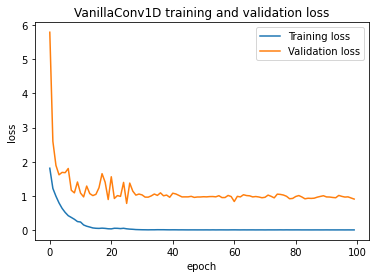

In [8]:
trainer.plot_loss("VanillaConv1D training and validation loss")

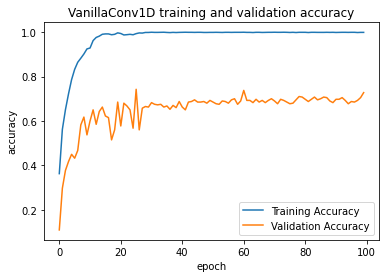

In [9]:
trainer.plot_accuracies("VanillaConv1D training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([3, 7, 7, 1, 4, 7, 5, 7, 6, 3, 5, 6, 6, 7, 7, 1, 9, 4, 4, 4, 4, 7, 8, 5,
         8, 3, 1, 6, 6, 7, 7, 4, 6, 8, 4, 8, 2, 7, 7, 4, 6, 5, 7, 0, 4, 3, 5, 4,
         8, 4, 7, 8, 7, 6, 6, 5, 7, 2, 6, 6, 6, 7, 6, 7, 2, 1, 6, 2, 6, 5, 7, 5,
         8, 5, 7, 6, 6, 8, 7, 3, 3, 6, 5, 3, 7, 8, 0, 5, 4, 3, 6, 7, 7, 1, 2, 4,
         4, 7, 5, 3, 3, 7, 5, 6, 5, 6, 4, 4, 5, 4, 6, 6, 5, 4, 3, 7, 3, 6, 6, 4,
         6, 3, 0, 8, 6, 6, 7, 7, 3, 4, 6, 7, 8, 7, 5, 1, 7, 9, 6, 5, 1, 6, 1, 7,
         3, 8, 7, 7, 3, 4, 6, 7, 1, 5, 7, 1, 6, 4, 8, 6, 2, 8, 8, 7, 4, 8, 5, 6,
         7, 5, 8, 1, 2, 2, 3, 1, 2, 8, 7, 5, 6, 2, 7, 5, 6, 3, 1, 4, 6, 1, 4, 9,
         1, 9, 7, 6, 3, 5, 8, 3, 6, 6, 5, 6, 4, 7, 2, 3, 1, 3, 3, 9, 7, 5, 5, 7,
         1, 1, 7, 1, 3, 7, 7, 9, 5, 6, 5, 5, 3, 3, 6, 7, 3, 8, 6, 7, 6, 6, 4, 4,
         5, 7, 1, 6, 7, 9, 7, 4, 7, 3, 7, 6, 6, 0, 7, 3, 6, 7, 0, 7, 3, 6, 6, 7,
         9, 7, 7, 9, 7, 6, 4, 5, 7, 8, 8, 6, 6, 1, 7, 3, 6, 8, 3, 7, 3, 1, 1, 1,
         7, 9, 7, 1, 2, 1, 7

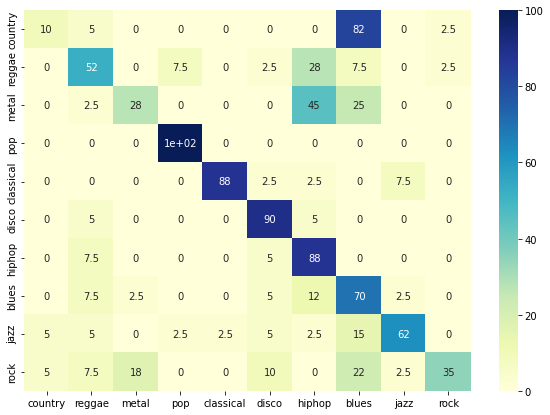

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.50      0.10      0.17        40
      reggae       0.57      0.53      0.55        40
       metal       0.58      0.28      0.37        40
         pop       0.91      1.00      0.95        40
   classical       0.97      0.88      0.92        40
       disco       0.75      0.90      0.82        40
      hiphop       0.48      0.88      0.62        40
       blues       0.31      0.70      0.43        40
        jazz       0.83      0.62      0.71        40
        rock       0.88      0.35      0.50        40

    accuracy                           0.62       400
   macro avg       0.68      0.62      0.60       400
weighted avg       0.68      0.62      0.60       400



In [13]:
lr = 0.001
model_2 = VanillaConv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

VanillaConv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer): Sequential(
    (0): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out_linear): Linear(in_features=384, out_features=10, bias=True)
)

In [14]:
trainer_2 = CNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=40)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 38.53
Training loss 1.8171
Validation accuracy 12.75
Validation loss 9.5453
============================== EPOCH 2 =================================
Training accuracy 56.94
Training loss 1.1863
Validation accuracy 20.00
Validation loss 4.0021
============================== EPOCH 3 =================================
Training accuracy 66.28
Training loss 0.9495
Validation accuracy 34.50
Validation loss 2.0596
============================== EPOCH 4 =================================
Training accuracy 74.28
Training loss 0.7401
Validation accuracy 56.50
Validation loss 1.2047
============================== EPOCH 5 =================================
Training accuracy 80.69
Training loss 0.5859
Validation accuracy 54.25
Validation loss 1.2114
============================== EPOCH 6 =================================
Training accuracy 82.84
Training loss 0.5108
Validation accuracy 47.25
Validation loss 1.553

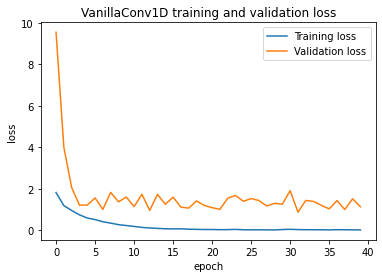

In [15]:
trainer_2.plot_loss("VanillaConv1D training and validation loss")

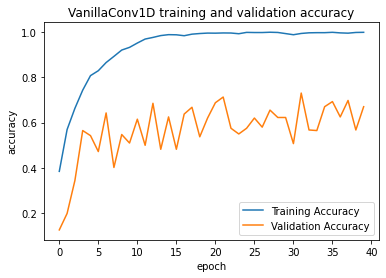

In [16]:
trainer_2.plot_accuracies("VanillaConv1D training and validation accuracy")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([6, 1, 6, 6, 6, 4, 6, 6, 8, 6, 8, 7, 8, 7, 6, 6, 3, 5, 4, 5, 5, 5, 4, 1,
         5, 6, 6, 6, 5, 7, 2, 3, 0, 4, 6, 2, 3, 4, 6, 6, 5, 2, 3, 8, 3, 4, 6, 7,
         7, 6, 4, 4, 1, 4, 6, 5, 7, 6, 7, 6, 6, 6, 8, 6, 4, 4, 5, 6, 3, 6, 4, 3,
         5, 5, 5, 1, 5, 6, 1, 7, 6, 4, 4, 3, 7, 9, 6, 6, 2, 0, 6, 5, 5, 3, 5, 6,
         3, 6, 6, 6, 6, 1, 5, 6, 4, 3, 3, 8, 3, 6, 5, 5, 6, 4, 5, 6, 4, 3, 8, 1,
         4, 3, 6, 6, 7, 1, 4, 6, 4, 7, 4, 7, 5, 4, 6, 0, 4, 8, 3, 5, 5, 4, 8, 6,
         2, 6, 9, 5, 8, 1, 4, 6, 6, 6, 4, 6, 4, 6, 7, 4, 1, 6, 4, 3, 5, 5, 6, 6,
         5, 6, 8, 7, 5, 6, 3, 6, 5, 8, 7, 2, 3, 2, 2, 6, 6, 5, 8, 6, 7, 3, 3, 7,
         3, 9, 7, 5, 9, 7, 5, 2, 8, 1, 4, 6, 7, 6, 6, 3, 6, 3, 7, 6, 6, 4, 2, 3,
         2, 5, 8, 7, 9, 8, 5, 4, 6, 4, 6, 7, 3, 2, 6, 6, 8, 6, 2, 2, 2, 6, 8, 3,
         7, 3, 2, 1, 1, 4, 5, 1, 0, 1, 7, 6, 3, 6, 4, 6, 5, 6, 6, 6, 7, 5, 9, 3,
         5, 7, 6, 1, 6, 4, 6, 7, 3, 2, 6, 5, 5, 6, 9, 3, 2, 6, 5, 6, 4, 7, 6, 5,
         6, 3, 3, 6, 7, 6, 8

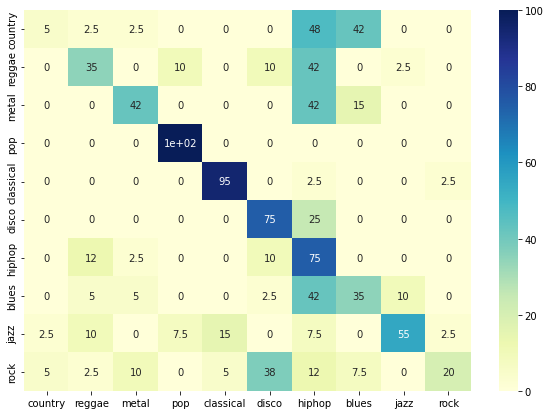

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.40      0.05      0.09        40
      reggae       0.52      0.35      0.42        40
       metal       0.68      0.42      0.52        40
         pop       0.85      1.00      0.92        40
   classical       0.83      0.95      0.88        40
       disco       0.56      0.75      0.64        40
      hiphop       0.25      0.75      0.38        40
       blues       0.35      0.35      0.35        40
        jazz       0.81      0.55      0.66        40
        rock       0.80      0.20      0.32        40

    accuracy                           0.54       400
   macro avg       0.60      0.54      0.52       400
weighted avg       0.60      0.54      0.52       400

